Wrapping trajectory...
Calculating number of "resname ASP and name C3" molecules inside the interface


  0%|                              |[Estimated time remaining: ?]

Execution time for 500 frames:  55.2235830690006
Processing solubilization based on radii...


Frames Processed: 100%|███████████████████████████████████████| 500/500 [00:03<00:00, 127.89frame/s]



--- Average and Standard Deviation for Entire Trajectory (0-1000 ns) ---
Solubilized ASP (C3) in Whole TRITO (within 48.48 Å of COM):
 - Average: 56.65
 - Standard Deviation: 2.54

Solubilized ASP (C3) in TRITO Core (within 34.08 Å of COM):
 - Average: 22.33
 - Standard Deviation: 1.94


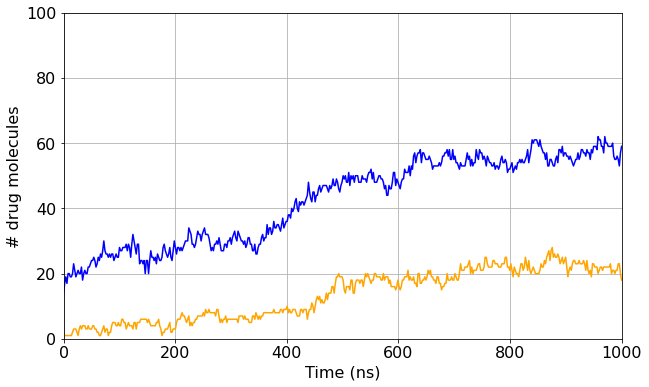

In [4]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from PUCHIK import Interface
from tqdm import tqdm

# Define file paths
trj = 'project3/asp_trx/merged_trajectory.xtc'
top = 'project3/asp_trx/asp900ns.tpr'

# Use your calculated radii from previous analysis
CORE_RADIUS = 34.08  # Core radius in Angstroms
INTERFACE_RADIUS = 48.48  # Micelle interface radius in Angstroms

# Step 1: Initialize MDAnalysis Universe
u = mda.Universe(top, trj)

# Initialize PUCHIK Interface if needed for comparison
m = Interface(trj, top)
m.select_atoms('all')
m.select_structure('resname TRITO')
solubilized_total_puchik = m.mol_count('resname ASP and name C3', start=0, end=1000, skip=2)

# Initialize lists for solubilization counts
solubilized_core = []
solubilized_total = []

print("Processing solubilization based on radii...")
for ts in tqdm(u.trajectory[0:1000:2], desc="Frames Processed", unit="frame", ncols=100):
    # Calculate micelle center of mass
    micelle_com = u.select_atoms("resname TRITO").center_of_mass()
    
    # Select ASP C3 atoms
    asp_c3_atoms = u.select_atoms('resname ASP and name C3')
    
    # Calculate distances from micelle COM to each ASP C3 atom
    distances = np.linalg.norm(asp_c3_atoms.positions - micelle_com, axis=1)
    
    # Count ASP molecules within core radius
    count_in_core = np.sum(distances <= CORE_RADIUS)
    solubilized_core.append(count_in_core)
    
    # Count ASP molecules within interface radius (whole micelle)
    count_in_total = np.sum(distances <= INTERFACE_RADIUS)
    solubilized_total.append(count_in_total)

# Generate time values
time = np.linspace(0, 1000, len(solubilized_total))
last_200ns_frames = int(len(solubilized_total) * 200 / 1000)  # Calculate how many frames correspond to last 200ns
total_avg = np.mean(solubilized_total[-last_200ns_frames:])
total_std = np.std(solubilized_total[-last_200ns_frames:])
core_avg = np.mean(solubilized_core[-last_200ns_frames:])
core_std = np.std(solubilized_core[-last_200ns_frames:])

# Print results
print("\n--- Average and Standard Deviation for Entire Trajectory (0-1000 ns) ---")
print(f"Solubilized ASP (C3) in Whole TRITO (within {INTERFACE_RADIUS:.2f} Å of COM):")
print(f" - Average: {total_avg:.2f}")
print(f" - Standard Deviation: {total_std:.2f}")
print(f"\nSolubilized ASP (C3) in TRITO Core (within {CORE_RADIUS:.2f} Å of COM):")
print(f" - Average: {core_avg:.2f}")
print(f" - Standard Deviation: {core_std:.2f}")

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(time, solubilized_total, label=f'In Whole Micelle (r ≤ {INTERFACE_RADIUS:.1f} Å)', color='blue')
plt.plot(time, solubilized_core, label=f'In Core (r ≤ {CORE_RADIUS:.1f} Å)', color='orange')

# Customize plot
plt.xlabel('Time (ns)', fontsize=16)
plt.ylabel('# drug molecules', fontsize=16)
plt.xticks(fontsize=16)  # Set x-axis tick label font size
plt.yticks(fontsize=16)  # Set y-axis tick label font size
plt.grid(True)
plt.margins(x=0)
plt.xlim(0, 1000)  # Remove fontsize from xlim, it doesn't accept this parameter
plt.ylim(0, 100)  # Remove fontsize from ylim

# Save and display
plt.savefig('ASP_Solubilization_in_TRITO_and_Core_MDA_2.jpg', dpi=300, bbox_inches='tight')
#plt.show()

Wrapping trajectory...
Calculating number of "resname ATEN and name C3" molecules inside the interface


  0%|                              |[Estimated time remaining: ?]

Execution time for 500 frames:  59.61573538499988
Processing solubilization based on radii...


Frames Processed: 100%|███████████████████████████████████████| 500/500 [00:03<00:00, 127.97frame/s]



--- Average and Standard Deviation for Entire Trajectory (0-1000 ns) ---
Solubilized ATEN (C3) in Whole TRITO (within 54.75 Å of COM):
 - Average: 52.51
 - Standard Deviation: 1.95

Solubilized ATEN (C3) in TRITO Core (within 43.46 Å of COM):
 - Average: 34.53
 - Standard Deviation: 2.60


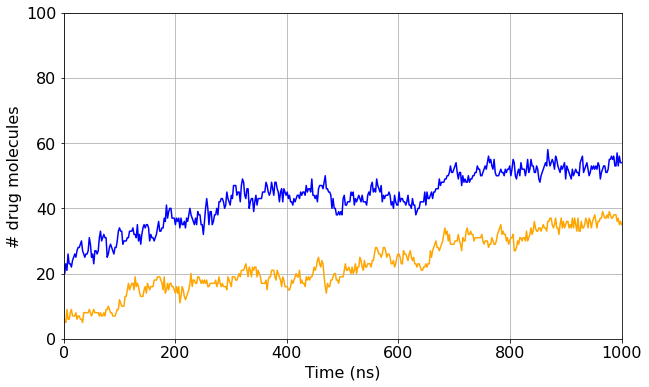

In [2]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from PUCHIK import Interface
from tqdm import tqdm

# Define file paths
trj = "project3/aten_trx/merged_aten.xtc"
top = "project3/aten_trx/aten900ns.tpr"

# Use your calculated radii from previous analysis
CORE_RADIUS = 43.46  # Core radius in Angstroms
INTERFACE_RADIUS = 54.75  # Micelle interface radius in Angstroms

# Step 1: Initialize MDAnalysis Universe
u = mda.Universe(top, trj)

# Initialize PUCHIK Interface if needed for comparison
m = Interface(trj, top)
m.select_atoms('all')
m.select_structure('resname TRITO')
solubilized_total_puchik = m.mol_count('resname ATEN and name C3', start=0, end=1000, skip=2)

# Initialize lists for solubilization counts
solubilized_core = []
solubilized_total = []

print("Processing solubilization based on radii...")
for ts in tqdm(u.trajectory[0:1000:2], desc="Frames Processed", unit="frame", ncols=100):
    # Calculate micelle center of mass
    micelle_com = u.select_atoms("resname TRITO").center_of_mass()
    
    # Select ASP C3 atoms
    asp_c3_atoms = u.select_atoms('resname ATEN and name C3')
    
    # Calculate distances from micelle COM to each ASP C3 atom
    distances = np.linalg.norm(asp_c3_atoms.positions - micelle_com, axis=1)
    
    # Count ASP molecules within core radius
    count_in_core = np.sum(distances <= CORE_RADIUS)
    solubilized_core.append(count_in_core)
    
    # Count ASP molecules within interface radius (whole micelle)
    count_in_total = np.sum(distances <= INTERFACE_RADIUS)
    solubilized_total.append(count_in_total)

# Generate time values
time = np.linspace(0, 1000, len(solubilized_total))
last_200ns_frames = int(len(solubilized_total) * 200 / 1000)  # Calculate how many frames correspond to last 200ns
total_avg = np.mean(solubilized_total[-last_200ns_frames:])
total_std = np.std(solubilized_total[-last_200ns_frames:])
core_avg = np.mean(solubilized_core[-last_200ns_frames:])
core_std = np.std(solubilized_core[-last_200ns_frames:])

# Print results
print("\n--- Average and Standard Deviation for Entire Trajectory (0-1000 ns) ---")
print(f"Solubilized ATEN (C3) in Whole TRITO (within {INTERFACE_RADIUS:.2f} Å of COM):")
print(f" - Average: {total_avg:.2f}")
print(f" - Standard Deviation: {total_std:.2f}")
print(f"\nSolubilized ATEN (C3) in TRITO Core (within {CORE_RADIUS:.2f} Å of COM):")
print(f" - Average: {core_avg:.2f}")
print(f" - Standard Deviation: {core_std:.2f}")

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(time, solubilized_total, label=f'In Whole Micelle (r ≤ {INTERFACE_RADIUS:.1f} Å)', color='blue')
plt.plot(time, solubilized_core, label=f'In Core (r ≤ {CORE_RADIUS:.1f} Å)', color='orange')

# Customize plot
plt.xlabel('Time (ns)', fontsize=16)
plt.ylabel('# drug molecules', fontsize=16)
plt.xticks(fontsize=16)  # Set x-axis tick label font size
plt.yticks(fontsize=16)  # Set y-axis tick label font size
plt.grid(True)
plt.margins(x=0)
plt.xlim(0, 1000)  # Remove fontsize from xlim, it doesn't accept this parameter
plt.ylim(0, 100)  # Remove fontsize from ylim

# Save and display
plt.savefig('ATEN_Solubilization_in_TRITO_and_Core_MDA_2.jpg', dpi=300, bbox_inches='tight')
plt.show()

Wrapping trajectory...
Calculating number of "resname FEL and name C3" molecules inside the interface


  0%|                              |[Estimated time remaining: ?]

Execution time for 500 frames:  49.67766182200012
Processing solubilization based on radii...


Frames Processed: 100%|███████████████████████████████████████| 500/500 [00:03<00:00, 133.97frame/s]



--- Average and Standard Deviation for Entire Trajectory (0-1000 ns) ---
Solubilized FEL (C3) in Whole TRITO (within 48.07 Å of COM):
 - Average: 66.22
 - Standard Deviation: 1.98

Solubilized FEL (C3) in TRITO Core (within 35.14 Å of COM):
 - Average: 27.65
 - Standard Deviation: 1.67


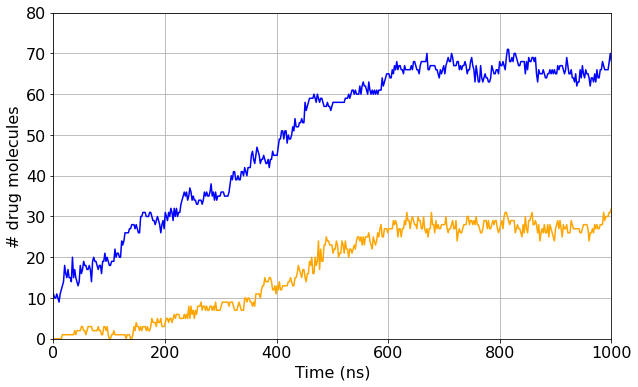

In [3]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from PUCHIK import Interface
from tqdm import tqdm

# Define file paths
trj = 'project3/fel_trx/merged_fel.xtc'
top = 'project3/fel_trx/fel900ns.tpr'

# Use your calculated radii from previous analysis
CORE_RADIUS = 35.14  # Core radius in Angstroms
INTERFACE_RADIUS = 48.07  # Micelle interface radius in Angstroms

# Step 1: Initialize MDAnalysis Universe
u = mda.Universe(top, trj)

# Initialize PUCHIK Interface if needed for comparison
m = Interface(trj, top)
m.select_atoms('all')
m.select_structure('resname TRITO')
solubilized_total_puchik = m.mol_count('resname FEL and name C3', start=0, end=1000, skip=2)

# Initialize lists for solubilization counts
solubilized_core = []
solubilized_total = []

print("Processing solubilization based on radii...")
for ts in tqdm(u.trajectory[0:1000:2], desc="Frames Processed", unit="frame", ncols=100):
    # Calculate micelle center of mass
    micelle_com = u.select_atoms("resname TRITO").center_of_mass()
    
    # Select ASP C3 atoms
    asp_c3_atoms = u.select_atoms('resname FEL and name C3')
    
    # Calculate distances from micelle COM to each ASP C3 atom
    distances = np.linalg.norm(asp_c3_atoms.positions - micelle_com, axis=1)
    
    # Count ASP molecules within core radius
    count_in_core = np.sum(distances <= CORE_RADIUS)
    solubilized_core.append(count_in_core)
    
    # Count ASP molecules within interface radius (whole micelle)
    count_in_total = np.sum(distances <= INTERFACE_RADIUS)
    solubilized_total.append(count_in_total)

# Generate time values
time = np.linspace(0, 1000, len(solubilized_total))

time = np.linspace(0, 1000, len(solubilized_total))
last_200ns_frames = int(len(solubilized_total) * 200 / 1000)  # Calculate how many frames correspond to last 200ns
total_avg = np.mean(solubilized_total[-last_200ns_frames:])
total_std = np.std(solubilized_total[-last_200ns_frames:])
core_avg = np.mean(solubilized_core[-last_200ns_frames:])
core_std = np.std(solubilized_core[-last_200ns_frames:])

# Print results
print("\n--- Average and Standard Deviation for Entire Trajectory (0-1000 ns) ---")
print(f"Solubilized FEL (C3) in Whole TRITO (within {INTERFACE_RADIUS:.2f} Å of COM):")
print(f" - Average: {total_avg:.2f}")
print(f" - Standard Deviation: {total_std:.2f}")
print(f"\nSolubilized FEL (C3) in TRITO Core (within {CORE_RADIUS:.2f} Å of COM):")
print(f" - Average: {core_avg:.2f}")
print(f" - Standard Deviation: {core_std:.2f}")

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(time, solubilized_total, label=f'In Whole Micelle (r ≤ {INTERFACE_RADIUS:.1f} Å)', color='blue')
plt.plot(time, solubilized_core, label=f'In Core (r ≤ {CORE_RADIUS:.1f} Å)', color='orange')

# Customize plot
plt.xlabel('Time (ns)', fontsize=16)
plt.ylabel('# drug molecules', fontsize=16)
plt.xticks(fontsize=16)  # Set x-axis tick label font size
plt.yticks(fontsize=16)  # Set y-axis tick label font size
plt.grid(True)
plt.margins(x=0)
plt.xlim(0, 1000)  # Remove fontsize from xlim, it doesn't accept this parameter
plt.ylim(0, 80)  # Remove fontsize from ylim

# Save and display
plt.savefig('FEL_Solubilization_in_TRITO_and_Core_MDA_2.jpg', dpi=300, bbox_inches='tight')
plt.show()